# Class 7- Starter

## Linear regression

**Pros:** fast, no tuning required, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

## Part 1: Linear Model and Error

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

### Create sample data and fit a model

In [2]:
df = pd.DataFrame({'x': range(100), 'y': range(100)})
biased_df  = df.copy()
biased_df.loc[:20, 'x'] = 1
biased_df.loc[:20, 'y'] = 1

def append_jitter(series):
    jitter = np.random.random_sample(size=100)
    return series + jitter

df['x'] = append_jitter(df.x)
df['y'] = append_jitter(df.y)

biased_df['x'] = append_jitter(biased_df.x)
biased_df['y'] = append_jitter(biased_df.y)


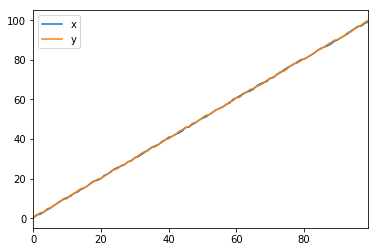

In [3]:
# plot data of "df"
df.plot()

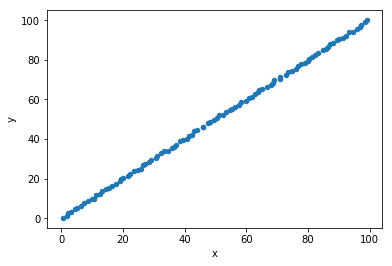

In [5]:
df.plot(x='x', y='y', kind='scatter')

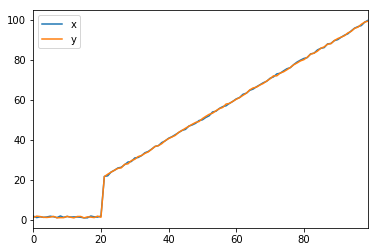

In [6]:
# plot data of "biased_df"
biased_df.plot()

In [7]:
# metrics.mean_squared_error(y, model.predict(X))
# two arrays, real value, and predicted value
metrics.mean_squared_error([1, 2, 3, 4, 5], [1, 2, 3, 4, 5])

0.0

In [8]:
metrics.mean_squared_error([1, 2, 3, 4, 5], [5, 4, 3, 2, 1])

8.0

In [9]:
## fit the "df" data in a linear model and print MSE value
lm = linear_model.LinearRegression().fit(df[['x']], df['y'])
print metrics.mean_squared_error(df['y'], lm.predict(df[['x']]))

0.172268467459


In [11]:
## fit the "biased_df" data in a linear model and print MSE value
lm2 = linear_model.LinearRegression().fit(biased_df[['x']], biased_df['y'])
print metrics.mean_squared_error(biased_df['y'], lm.predict(biased_df[['x']]))

0.168825490193


***
***

## Part 2: Example of Linear Model Using Advertising Data

### Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

In [12]:
# read CSV file directly from a URL and save the results
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# display the first 5 rows

In [13]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [14]:
# display the last 5 rows
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [16]:
# check the shape of the DataFrame (rows, columns)
data.shape

(200, 4)

### Preparing X and y using pandas

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [17]:
# create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['TV', 'radio', 'newspaper']]

# print the first 5 rows
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [18]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [19]:
# select a Series from the DataFrame
y = data['sales']

# equivalent command that works if there are no spaces in the column name
y = data.sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [20]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


### Splitting X and y into training and testing sets

In [26]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.25)

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


### Linear regression in scikit-learn

In [28]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Interpreting model coefficients

In [29]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [30]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.046564567874150281),
 ('radio', 0.17915812245088836),
 ('newspaper', 0.0034504647111804347)]

$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$

### Making predictions

In [32]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
y_pred

array([ 21.70910292,  16.41055243,   7.60955058,  17.80769552,
        18.6146359 ,  23.83573998,  16.32488681,  13.43225536,
         9.17173403,  17.333853  ,  14.44479482,   9.83511973,
        17.18797614,  16.73086831,  15.05529391,  15.61434433,
        12.42541574,  17.17716376,  11.08827566,  18.00537501,
         9.28438889,  12.98458458,   8.79950614,  10.42382499,
        11.3846456 ,  14.98082512,   9.78853268,  19.39643187,
        18.18099936,  17.12807566,  21.54670213,  14.69809481,
        16.24641438,  12.32114579,  19.92422501,  15.32498602,
        13.88726522,  10.03162255,  20.93105915,   7.44936831,
         3.64695761,   7.22020178,   5.9962782 ,  18.43381853,
         8.39408045,  14.08371047,  15.02195699,  20.35836418,
        20.57036347,  19.60636679])


We need an **evaluation metric** in order to compare our predictions with the actual values!

## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

In [33]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [34]:
# calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [35]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [36]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.2474487139
12.2474487139


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

### Computing the RMSE for our Sales predictions

In [37]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303


### Feature selection

Does **Newspaper** "belong" in our model? In other words, does it improve the quality of our predictions?

Let's **remove it** from the model and check the RMSE!

In [38]:
# create a Python list of feature names
feature_cols = ['TV', 'radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.38790346994


The RMSE **decreased** when we removed Newspaper from the model. (Error is something we want to minimize, so **a lower number for RMSE is better**.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

***
***

## Part 3: Cross validation

### Review of model evaluation procedures

**Motivation:** Need a way to choose between machine learning models

- Goal is to estimate likely performance of a model on **out-of-sample data**

**Initial idea:** Train and test on the same data

- But, maximizing **training accuracy** rewards overly complex models which **overfit** the training data

**Alternative idea:** Train/test split

- Split the dataset into two pieces, so that the model can be trained and tested on **different data**
- **Testing accuracy** is a better estimate than training accuracy of out-of-sample performance
- But, it provides a **high variance** estimate since changing which observations happen to be in the testing set can significantly change testing accuracy

### Steps for K-fold cross-validation

1. Split the dataset into K **equal** partitions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K times, using a **different fold** as the testing set each time.
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.

In [39]:
from sklearn import cross_validation
wd = '../datasets/'
bikeshare = pd.read_csv(wd + 'bikeshare.csv')

#### Create dummy variables and set outcome (dependent) variable

In [40]:
weather = pd.get_dummies(bikeshare.weathersit, prefix='weather')
modeldata = bikeshare[['temp', 'hum']].join(weather[['weather_1', 'weather_2', 'weather_3']])
y = bikeshare.casual 

#### Create a cross valiation with 5 folds

In [41]:
kf = cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True)

In [42]:
mse_values = []
scores = []
n= 0
print "~~~~ CROSS VALIDATION each fold ~~~~"
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
    scores.append(lm.score(modeldata, y))
    n+=1
    print 'Model', n
    print 'MSE:', mse_values[n-1]
    print 'R2:', scores[n-1]


print "~~~~ SUMMARY OF CROSS VALIDATION ~~~~"
print 'Mean of MSE for all folds:', np.mean(mse_values)
print 'Mean of R2 for all folds:', np.mean(scores)

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 1707.15747847
R2: 0.311832587054
Model 2
MSE: 1617.95821786
R2: 0.311878621938
Model 3
MSE: 1824.18486563
R2: 0.311883434571
Model 4
MSE: 1690.64391217
R2: 0.31191071792
Model 5
MSE: 1530.40766882
R2: 0.311825118839
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 1674.07042859
Mean of R2 for all folds: 0.311866096064


In [43]:
lm = linear_model.LinearRegression().fit(modeldata, y)
print "~~~~ Single Model ~~~~"
print 'MSE of single model:', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'R2: ', lm.score(modeldata, y)

~~~~ Single Model ~~~~
MSE of single model: 1672.58110765
R2:  0.311934605989


### Check
While the cross validated approach here generated more overall error, which of the two approaches would predict new data more accurately: the single model or the cross validated, averaged one? Why?


#### Answer: 
Cross validated will be less biased, but still depends on the data

***
***

## Part 4: Cross-validation example

**Goal**: Select whether the Newspaper feature should be included in the linear regression model on the advertising dataset

In [44]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

In [45]:
# read in the advertising dataset
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [46]:
# create a Python list of three feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the DataFrame (X)
X = data[feature_cols]

# select the Sales column as the response (y)
y = data.sales

In [47]:
# 10-fold cross-validation with all three features
# X and y are the X_train and y_train
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [48]:
# fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


In [49]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[ 1.88689808  1.81595022  1.44548731  1.68069713  1.14139187  1.31971064
  2.85891276  1.45399362  1.7443426   1.56614748]


In [53]:
# calculate the average RMSE
print(mse_scores.mean())

3.05996761812


{'boxes': [<matplotlib.lines.Line2D at 0x11bc83850>],
 'caps': [<matplotlib.lines.Line2D at 0x11bc937d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x11bc9ead0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11bc9e490>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11bc83a50>,
  <matplotlib.lines.Line2D at 0x11bc93190>]}

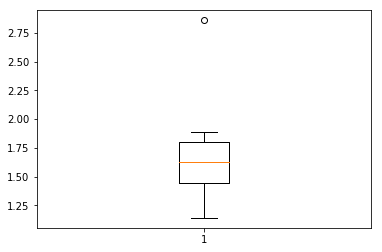

In [54]:
import matplotlib.pyplot as plt
plt.boxplot(rmse_scores)

In [55]:
# 10-fold cross-validation with two features (excluding Newspaper)
feature_cols = ['TV', 'radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')).mean())

1.67967484191


***
***

## Part 5: Regularization and cross validation

If your model is very complex (i.e., lots of features, possibly a polynomial fit, etc.), you need to worry more about overfitting.
- You'll need regularization when your model is complex, which happens when you have little data or many features.
- The example below uses the same dataset as above, but with fewer samples, and a relatively high degree model.
- We'll fit the (unregularized) `LinearRegression`, as well as the (regularized) `Ridge` and `Lasso` model.
  - Lasso regression imposes an L1 prior on the coefficient, causing many coeffiecients to be zero.
  - Ridge regression imposes an L2 prior on the coefficient, causing outliers to be less likely, and coeffiecients to be small across the board.

In [56]:
modeldata = bikeshare[['temp', 'hum']].join(weather[['weather_1', 'weather_2', 'weather_3']])
y = bikeshare.casual 
lm = linear_model.LinearRegression().fit(modeldata, y)
print "~~~ OLS ~~~"
print 'OLS MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'OLS R2:', lm.score(modeldata, y)

lm = linear_model.Lasso().fit(modeldata, y)
print "~~~ Lasso ~~~"
print 'Lasso MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'Lasso R2:', lm.score(modeldata, y)

lm = linear_model.Ridge().fit(modeldata, y)
print "~~~ Ridge ~~~"
print 'Ridge MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'Ridge R2:', lm.score(modeldata, y)

~~~ OLS ~~~
OLS MSE:  1672.58110765
OLS R2: 0.311934605989
~~~ Lasso ~~~
Lasso MSE:  1725.41581608
Lasso R2: 0.290199495922
~~~ Ridge ~~~
Ridge MSE:  1672.60490113
Ridge R2: 0.311924817843


### Polynomial regression

Given the following function of the "ground truth", and a few sample data points we will use for regression.

In [57]:
func = lambda x: x * np.sin(x)

In [58]:
N, n = 1000, 10
domain = np.linspace(0, 10, N)
x_sample = np.sort(np.random.choice(domain, n))
y_sample = func(x_sample)

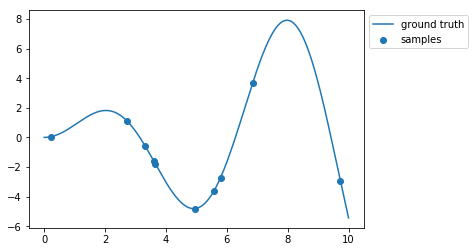

In [59]:
f = plt.plot(domain, func(domain), label="ground truth")
f = plt.scatter(x_sample, func(x_sample), label="samples")
f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))

Obviously linear regression won't bring you far:

R2 = 0.0507706848943


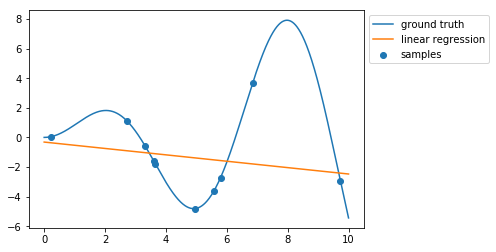

In [60]:
X = np.array([x_sample]).T
model = LinearRegression().fit(X, y_sample)
print "R2 =", model.score(X, y_sample)
f = plt.plot(domain, func(domain), label="ground truth")
f = plt.scatter(x_sample, func(x_sample), label="samples")
f = plt.plot([0, 10], [model.intercept_, model.intercept_ + 10 * model.coef_[0]], label="linear regression")
f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))

Now try a few polynomial regressions to fit the given sample data points.

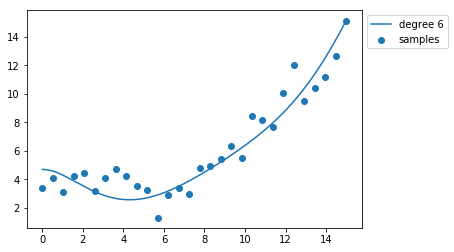

In [65]:
X = np.array([x_sample]).T
# f = plt.plot(x, func(x), label="ground truth", alpha=.4)
f = plt.scatter(x_sample, func(x_sample), label="samples")

degree = 6
model = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X, y_sample)
y_pred = model.predict(np.array([domain]).T)
plt.plot(domain, y_pred, label="degree %d" % degree)

f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))

- It's actually a result from algebra that you can fit *any* finite set of data points with a polynomial. 
- In fact, for any set of $n$ data points, there exists a polynomial of degree $n$ that goes right through them.
- This is great if you'd want to approximate your data arbitrarily closely.
- It's not great if you're afraid of overfitting your data

### Overfitting

Suppose you want to find a model behind some data, which also contains some arbitrary noise.

In [66]:
func = lambda x: 1 + .1 * (x - 4) ** 2 + 4 * np.random.random(len(x))

In [67]:
N, n = 1000, 30
domain = np.linspace(0, 15, N)
x_sample = np.linspace(0, 15, n)
y_sample = func(x_sample)

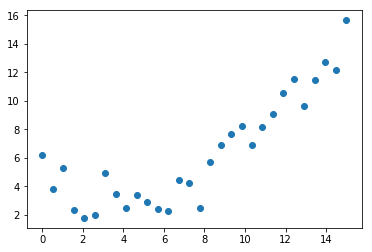

In [68]:
f = plt.scatter(x_sample, func(x_sample))

Obviously you could fit this noise by an arbitrarily complex model.

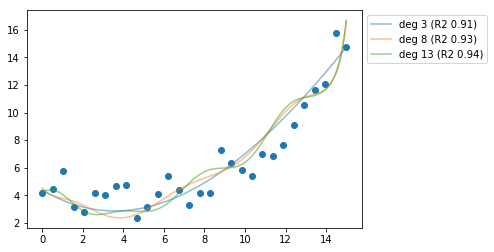

In [69]:
X = np.array([x_sample]).T
f = plt.scatter(x_sample, func(x_sample))

for degree in [3, 8, 13]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X, y_sample)
    y_pred = model.predict(np.array([domain]).T)
    plt.plot(domain, y_pred, alpha=.5, label="deg %d (R2 %.2f)" % (degree, model.score(X, y_sample)))

f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))

It makes sense that that is obviously not what you want.

For degree 1 , R2 = 0.635932716715
For degree 2 , R2 = 0.847680293134
For degree 3 , R2 = 0.758934595799
For degree 4 , R2 = 0.787233630334
For degree 5 , R2 = 0.797392107349


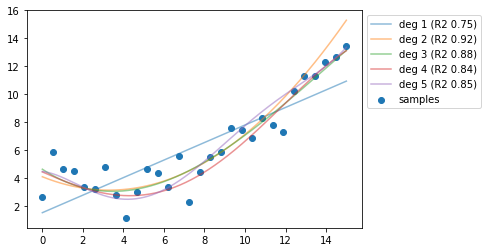

In [70]:
f = plt.scatter(x_sample, func(x_sample), label="samples")
for degree in [1, 2, 3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    # Compute a few R2 scores and print average performance
    scores = []
    for k in xrange(15):
        X_train, X_test, y_train, y_test = train_test_split(X, y_sample, train_size=.7)
        scores.append(model.fit(X_train, y_train).score(X_test, y_test))
    print "For degree", degree, ", R2 =", np.mean(scores)
    # Take last model to plot predictions
    y_pred = model.predict(np.array([domain]).T)
    plt.plot(domain, y_pred, alpha=.5, label="deg %d (R2 %.2f)" % (degree, model.score(X_test, y_test)))

    f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))

It seems that a second or third degree polynomial performs better than a fifth one on unseen data, which makes sense, since that's how we generated the samples.

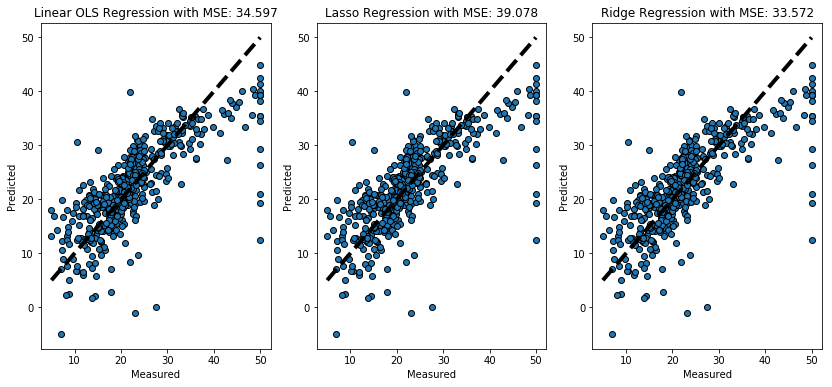

In [71]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


lr = linear_model.LinearRegression()
param_grid = {"alpha": [10,8,5,4,3,2,1,0.5, 1e-1, 1e-2, 1e-3]}
la = GridSearchCV(linear_model.Lasso(), cv=10, param_grid=param_grid)
rl = GridSearchCV(linear_model.Ridge(), cv=10, param_grid=param_grid)
boston = datasets.load_boston()
y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, boston.data, y, cv=10)
predicted_la = cross_val_predict(la, boston.data, y, cv=10)
predicted_rl = cross_val_predict(rl, boston.data, y, cv=10)

plt.figure(figsize=(14, 6))
plt.subplot(131)
ax = plt.gca()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
mse = round(mean_squared_error(y,predicted),3)
plt.title('Linear OLS Regression with MSE: ' + str(mse))

plt.subplot(132)
ax = plt.gca()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
mse_la = round(mean_squared_error(y,predicted_la),3)
plt.title('Lasso Regression with MSE: ' + str(mse_la))

plt.subplot(133)
ax = plt.gca()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
mse_rl = round(mean_squared_error(y,predicted_rl),3)
plt.title('Ridge Regression with MSE: ' + str(mse_rl))


plt.show()

***
***

## Part 6: Understanding Regularization Effects

Figuring out the alphas can be done by "hand"

In [79]:
modeldata = bikeshare[['temp', 'hum']].join(weather[['weather_1', 'weather_2', 'weather_3']])
y = bikeshare.casual
alphas = np.logspace(-10, 10, 21)
for a in alphas:
    print '\nAlpha:', a
    lm = linear_model.Ridge(alpha=a)
    lm.fit(modeldata, y)
    print ("lm coef: \t")
    print lm.coef_
    print ("MSE: \t")
    print metrics.mean_squared_error(y, lm.predict(modeldata))


Alpha: 1e-10
lm coef: 	
[ 112.68901765  -84.01121684  -24.68489063  -21.00314493  -21.71893628]
MSE: 	
1672.58110765

Alpha: 1e-09
lm coef: 	
[ 112.68901765  -84.01121684  -24.68489061  -21.00314491  -21.71893626]
MSE: 	
1672.58110765

Alpha: 1e-08
lm coef: 	
[ 112.68901765  -84.01121684  -24.6848904   -21.00314471  -21.71893606]
MSE: 	
1672.58110765

Alpha: 1e-07
lm coef: 	
[ 112.68901763  -84.01121682  -24.68488837  -21.00314268  -21.71893403]
MSE: 	
1672.58110765

Alpha: 1e-06
lm coef: 	
[ 112.68901745  -84.01121667  -24.68486804  -21.00312237  -21.71891373]
MSE: 	
1672.58110765

Alpha: 1e-05
lm coef: 	
[ 112.68901562  -84.01121509  -24.68466472  -21.00291929  -21.71871079]
MSE: 	
1672.58110765

Alpha: 0.0001
lm coef: 	
[ 112.68899732  -84.01119938  -24.68263174  -21.00088873  -21.71668162]
MSE: 	
1672.58110765

Alpha: 0.001
lm coef: 	
[ 112.68881437  -84.01104228  -24.66232204  -20.98060316  -21.69640993]
MSE: 	
1672.58110774

Alpha: 0.01
lm coef: 	
[ 112.68698753  -84.00947323  -

### GRID SEARCH CV, SOLVING FOR ALPHA

Or we can use grid search to make this faster

In [96]:
from sklearn import grid_search

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas},
    scoring='mean_squared_error')

gs.fit(modeldata, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

##### Best score 

In [97]:
print gs.best_score_ 

-1814.09369133


##### mean squared error here comes in negative, so let's make it positive.

In [98]:
print -gs.best_score_ 

1814.09369133


##### explains which grid_search setup worked best

In [99]:
print gs.best_estimator_ 

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


##### shows all the grid pairings and their performances.

In [100]:
(gs.grid_scores_)

[mean: -1817.58711, std: 542.14315, params: {'alpha': 1e-10}, mean: -1817.58711, std: 542.14315, params: {'alpha': 1.0000000000000001e-09}, mean: -1817.58711, std: 542.14315, params: {'alpha': 1e-08}, mean: -1817.58711, std: 542.14315, params: {'alpha': 9.9999999999999995e-08}, mean: -1817.58711, std: 542.14315, params: {'alpha': 9.9999999999999995e-07}, mean: -1817.58711, std: 542.14317, params: {'alpha': 1.0000000000000001e-05}, mean: -1817.58707, std: 542.14331, params: {'alpha': 0.0001}, mean: -1817.58663, std: 542.14477, params: {'alpha': 0.001}, mean: -1817.58230, std: 542.15933, params: {'alpha': 0.01}, mean: -1817.54318, std: 542.30102, params: {'alpha': 0.10000000000000001}, mean: -1817.20111, std: 543.63587, params: {'alpha': 1.0}, mean: -1814.09369, std: 556.35563, params: {'alpha': 10.0}, mean: -1818.51694, std: 653.68607, params: {'alpha': 100.0}, mean: -2125.58777, std: 872.45270, params: {'alpha': 1000.0}, mean: -2458.08836, std: 951.30428, params: {'alpha': 10000.0}, me

***
***

## Part 7: Gradient Descent

In [101]:
num_to_approach, start, steps, optimized = 6.2, 0., [-1, 1], False
while not optimized:
    current_distance = num_to_approach - start
    got_better = False
    next_steps = [start + i for i in steps]
    for n in next_steps:
        distance = np.abs(num_to_approach - n)
        if distance < current_distance:
            got_better = True
            print distance, 'is better than', current_distance
            current_distance = distance
            start = n
    if got_better:
        print 'found better solution! using', current_distance
        a += 1
    else:
        optimized = True
        print start, 'is closest to', num_to_approach


5.2 is better than 6.2
found better solution! using 5.2
4.2 is better than 5.2
found better solution! using 4.2
3.2 is better than 4.2
found better solution! using 3.2
2.2 is better than 3.2
found better solution! using 2.2
1.2 is better than 2.2
found better solution! using 1.2
0.2 is better than 1.2
found better solution! using 0.2
6.0 is closest to 6.2


For the DP example below, it might be a great idea for students to take the code and implement a stopping point, similar to what n_iter would do in gradient descent.

There can be a great conversation about stopping early and still _kinda_ getting the right result vs taking a longer time to solve and having a more precise model.

That solution is below.

In [102]:
num_to_approach, start, steps, optimized = 6.2, 0., [-1, 1], False
n_iter = 0
while not optimized:
    if n_iter > 3:
        print 'stopping iterations'
        break
    n_iter += 1
    current_distance = num_to_approach - start
    got_better = False
    next_steps = [start + i for i in steps]
    for n in next_steps:
        distance = np.abs(num_to_approach - n)
        if distance < current_distance:
            got_better = True
            print distance, 'is better than', current_distance
            current_distance = distance
            start = n
    if got_better:
        print 'found better solution! using', current_distance
        a += 1
    else:
        optimized = True
        print start, 'is closest to', num_to_approach


5.2 is better than 6.2
found better solution! using 5.2
4.2 is better than 5.2
found better solution! using 4.2
3.2 is better than 4.2
found better solution! using 3.2
2.2 is better than 3.2
found better solution! using 2.2
stopping iterations


### Demo: Application of Gradient Descent 

In [103]:
lm = linear_model.SGDRegressor()
lm.fit(modeldata, y)
print "Gradient Descent R2:", lm.score(modeldata, y)
print "Gradient Descent MSE:", metrics.mean_squared_error(y, lm.predict(modeldata))

Gradient Descent R2: 0.30853407809
Gradient Descent MSE: 1680.84726778


## Part 8: Independent Practice: Bike data revisited

There are tons of ways to approach a regression problem. The regularization techniques appended to ordinary least squares optimizes the size of coefficients to best account for error. Gradient Descent also introduces learning rate (how aggressively do we solve the problem), epsilon (at what point do we say the error margin is acceptable), and iterations (when should we stop no matter what?)

For this deliverable, our goals are to:

- implement the gradient descent approach to our bike-share modeling problem,
- show how gradient descent solves and optimizes the solution,
- demonstrate the grid_search module!

While exploring the Gradient Descent regressor object, you'll build a grid search using the stochastic gradient descent estimator for the bike-share data set. Continue with either the model you evaluated last class or the simpler one from today. In particular, be sure to implement the "param_grid" in the grid search to get answers for the following questions:

- With a set of alpha values between 10^-10 and 10^-1, how does the mean squared error change?
- Based on the data, we know when to properly use l1 vs l2 regularization. By using a grid search with l1_ratios between 0 and 1 (increasing every 0.05), does that statement hold true? If not, did gradient descent have enough iterations?
- How do these results change when you alter the learning rate (eta0)?

**Bonus**: Can you see the advantages and disadvantages of using gradient descent after finishing this exercise?

### Starter Code

In [104]:
params = {} # put your gradient descent parameters here
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='mean_squared_error',
    )

gs.fit(modeldata, y)

print 'BEST ESTIMATOR'
print -gs.best_score_
print gs.best_estimator_
print 'ALL ESTIMATORS'
print gs.grid_scores_

BEST ESTIMATOR
1691.51879015
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)
ALL ESTIMATORS
[mean: -1691.51879, std: 139.17066, params: {}]
